# 最小二乘法：多项式拟合实例

### 杜小勤，武汉纺织大学数学与计算机学院，2020年02月05日
https://github.com/duxiaoqin/Lecture-notes-for-Machine-Learning

高斯-马尔科夫定理表明，在满足一定条件时（随机噪声$\epsilon$的均值$\mathbb{E}[\epsilon|\boldsymbol{X}]=0$且独立于$\boldsymbol{x}$；随机噪声$\boldsymbol{\epsilon}$的方差$\text{Var}(\boldsymbol{\epsilon}|\boldsymbol{X})=\sigma^{2}\boldsymbol{I}$恒定不变），最小二乘法得到的线性回归参数在所有的无偏估计中具有最优的有效性，即方差最小。证明过程详见《机器学习算法背后的理论与优化》，史春奇等，清华大学出版社，2019年7月第1版，1.2.2节。

实例：$y=sin(2\pi x)+\epsilon$，其中$\epsilon$为正态分布噪声，试用一个多项式去拟合该函数。

In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

np.random.seed()

生成待拟合的数据点（带噪声）并绘制

In [2]:
X = np.linspace(0, 1, 10) #待拟合的点x坐标

Y = np.sin(2*np.pi*X) #待拟合的点y坐标
epsilon = np.random.normal(0, 0.1, size = X.shape)
Y = Y + epsilon

print(X.shape)
print(Y.shape)
print(epsilon.shape)

(10,)
(10,)
(10,)


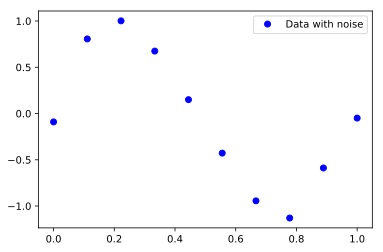

In [3]:
plt.plot(X, Y, 'bo', label = 'Data with noise')
plt.legend()
plt.savefig('POLY_OUTPUT1.pdf', bbox_inches='tight')

生成原始数据点（不带噪声）并进行绘制

In [4]:
X_points = np.linspace(0, 1, 500) #待绘制的点x坐标
Y_points = np.sin(2*np.pi*X_points) #待绘制的点y坐标

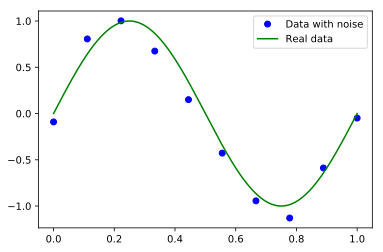

In [5]:
plt.plot(X, Y, 'bo', label = 'Data with noise')
plt.plot(X_points, Y_points, 'g', label = 'Real data')
plt.legend()
plt.savefig('POLY_OUTPUT2.pdf', bbox_inches='tight')

使用最小二乘法拟合

定义误差函数

In [6]:
#W是多项式的参数
def error(W, x, y):
    f = np.poly1d(W) #poly1d生成一个多项式。注意，它的x多项式次数由高到低的顺序排列
    return f(x)-y

多项式次数M=0

W:  [-0.05975641]


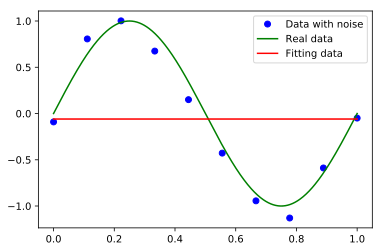

In [7]:
M = 0 #多项式次数
W = np.random.rand(M+1) #随机生成多项式参数
lsq = leastsq(error, W, args = (X, Y))
W = lsq[0]
print('W: ', W)
plt.plot(X, Y, 'bo', label = 'Data with noise')
plt.plot(X_points, Y_points, 'g', label = 'Real data')
plt.plot(X_points, np.poly1d(W)(X_points), 'r', label = 'Fitting data')
plt.legend()
plt.savefig('POLY_OUTPUT3.pdf', bbox_inches='tight')

多项式次数M=1

W:  [-1.38995301  0.63522009]


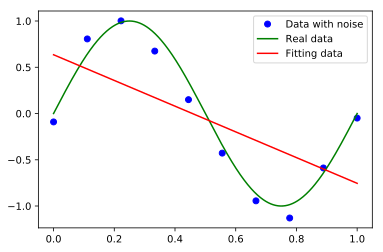

In [8]:
M = 1 #多项式次数
W = np.random.rand(M+1) #随机生成多项式参数
lsq = leastsq(error, W, args = (X, Y))
W = lsq[0]
print('W: ', W)
plt.plot(X, Y, 'bo', label = 'Data with noise')
plt.plot(X_points, Y_points, 'g', label = 'Real data')
plt.plot(X_points, np.poly1d(W)(X_points), 'r', label = 'Fitting data')
plt.legend()
plt.savefig('POLY_OUTPUT4.pdf', bbox_inches='tight')

多项式次数M=3

W:  [ 21.6654279  -31.99427083  10.43674666  -0.03906071]


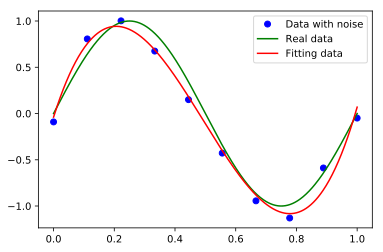

In [9]:
M = 3 #多项式次数
W = np.random.rand(M+1) #随机生成多项式参数
lsq = leastsq(error, W, args = (X, Y))
W = lsq[0]
print('W: ', W)
plt.plot(X, Y, 'bo', label = 'Data with noise')
plt.plot(X_points, Y_points, 'g', label = 'Real data')
plt.plot(X_points, np.poly1d(W)(X_points), 'r', label = 'Fitting data')
plt.legend()
plt.savefig('POLY_OUTPUT5.pdf', bbox_inches='tight')

多项式次数M=9

W:  [ -1.03820137e+03   4.36067832e+03  -8.06011405e+03   8.60351460e+03
  -5.74827113e+03   2.39828378e+03  -5.60711281e+02   3.64616941e+01
   8.40101803e+00  -9.08754331e-02]


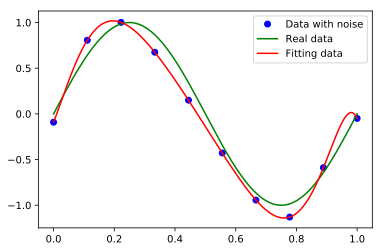

In [10]:
M = 9 #多项式次数
W = np.random.rand(M+1) #随机生成多项式参数
lsq = leastsq(error, W, args = (X, Y))
W = lsq[0]
print('W: ', W)
plt.plot(X, Y, 'bo', label = 'Data with noise')
plt.plot(X_points, Y_points, 'g', label = 'Real data')
plt.plot(X_points, np.poly1d(W)(X_points), 'r', label = 'Fitting data')
plt.legend()
plt.savefig('POLY_OUTPUT6.pdf', bbox_inches='tight')

正则化

当M=9时，曲线拟合容易出现过拟合，可以引入正则化项(regularizer)：

$$L(\boldsymbol{w})=\frac{1}{n}\sum\limits_{i=1}^n(f(\boldsymbol{x}_i,\boldsymbol{w})-\boldsymbol{y}_i)^2+\frac{\lambda}{2}||\boldsymbol{w}||^2$$

对于回归问题，正则化项可以是参数向量$\boldsymbol{w}$的$L_{2}$范数，也可以是$L_{1}$范数。此处，使用$L_{2}$范数。

W:  [ -5.44869807  -1.27629572   2.49406481   5.33300197   6.3270061
   3.97415888  -3.61557397 -14.75558235   6.85824918   0.08918448]


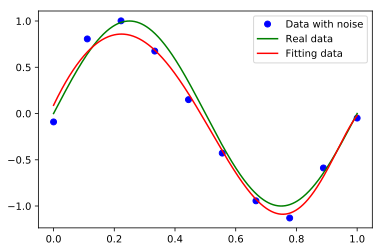

In [11]:
#W是多项式的参数
weight = 0.001
def error_L2(W, x, y):
    f = np.poly1d(W) #poly1d生成一个多项式。注意，它的x多项式次数由高到低的顺序排列
    return np.append(f(x)-y, np.sqrt(0.5*weight*np.square(W)))

M = 9 #多项式次数
W = np.random.rand(M+1) #随机生成多项式参数
lsq = leastsq(error_L2, W, args = (X, Y))
W = lsq[0]
print('W: ', W)
plt.plot(X, Y, 'bo', label = 'Data with noise')
plt.plot(X_points, Y_points, 'g', label = 'Real data')
plt.plot(X_points, np.poly1d(W)(X_points), 'r', label = 'Fitting data')
plt.legend()
plt.savefig('POLY_OUTPUT7.pdf', bbox_inches='tight')

不同的权重参数$\lambda$对拟合结果的影响

W:  [-0.91456068  0.43808918  1.54508144  2.17197005  1.96624088  0.46598583
 -2.63340642 -5.88602947  2.51110434  0.38152856]


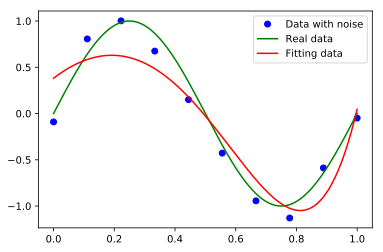

In [12]:
#W是多项式的参数
weight = 0.01
def error_L2(W, x, y):
    f = np.poly1d(W) #poly1d生成一个多项式。注意，它的x多项式次数由高到低的顺序排列
    return np.append(f(x)-y, np.sqrt(0.5*weight*np.square(W)))

M = 9 #多项式次数
W = np.random.rand(M+1) #随机生成多项式参数
lsq = leastsq(error_L2, W, args = (X, Y))
W = lsq[0]
print('W: ', W)
plt.plot(X, Y, 'bo', label = 'Data with noise')
plt.plot(X_points, Y_points, 'g', label = 'Real data')
plt.plot(X_points, np.poly1d(W)(X_points), 'r', label = 'Fitting data')
plt.legend()
plt.savefig('POLY_OUTPUT8.pdf', bbox_inches='tight')

W:  [ 0.8351165   0.80098829  0.69613939  0.4847631   0.11993153 -0.44535836
 -1.19615234 -1.77296075 -0.15302984  0.59273811]


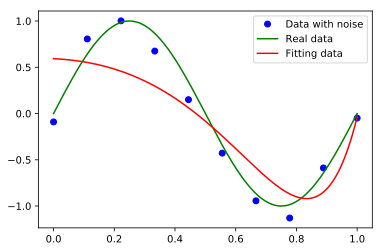

In [13]:
#W是多项式的参数
weight = 0.1
def error_L2(W, x, y):
    f = np.poly1d(W) #poly1d生成一个多项式。注意，它的x多项式次数由高到低的顺序排列
    return np.append(f(x)-y, np.sqrt(0.5*weight*np.square(W)))

M = 9 #多项式次数
W = np.random.rand(M+1) #随机生成多项式参数
lsq = leastsq(error_L2, W, args = (X, Y))
W = lsq[0]
print('W: ', W)
plt.plot(X, Y, 'bo', label = 'Data with noise')
plt.plot(X_points, Y_points, 'g', label = 'Real data')
plt.plot(X_points, np.poly1d(W)(X_points), 'r', label = 'Fitting data')
plt.legend()
plt.savefig('POLY_OUTPUT9.pdf', bbox_inches='tight')

W:  [ 0.36797677  0.31321371  0.23919257  0.13873591  0.00255738 -0.17925908
 -0.40841186 -0.63715373 -0.57002881  0.41378759]


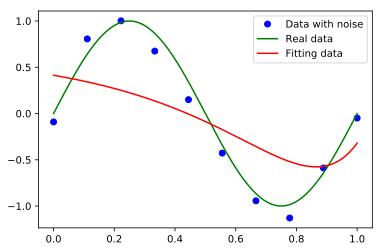

In [14]:
#W是多项式的参数
weight = 1
def error_L2(W, x, y):
    f = np.poly1d(W) #poly1d生成一个多项式。注意，它的x多项式次数由高到低的顺序排列
    return np.append(f(x)-y, np.sqrt(0.5*weight*np.square(W)))

M = 9 #多项式次数
W = np.random.rand(M+1) #随机生成多项式参数
lsq = leastsq(error_L2, W, args = (X, Y))
W = lsq[0]
print('W: ', W)
plt.plot(X, Y, 'bo', label = 'Data with noise')
plt.plot(X_points, Y_points, 'g', label = 'Real data')
plt.plot(X_points, np.poly1d(W)(X_points), 'r', label = 'Fitting data')
plt.legend()
plt.savefig('POLY_OUTPUT10.pdf', bbox_inches='tight')

W:  [ 0.02654234  0.01624581  0.00286996 -0.01466183 -0.03775671 -0.06799672
 -0.10605245 -0.14633444 -0.15000933  0.07702366]


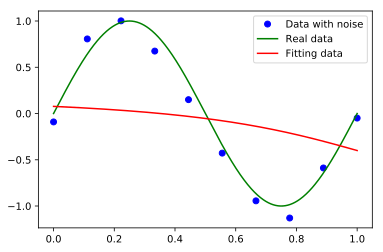

In [15]:
#W是多项式的参数
weight = 10
def error_L2(W, x, y):
    f = np.poly1d(W) #poly1d生成一个多项式。注意，它的x多项式次数由高到低的顺序排列
    return np.append(f(x)-y, np.sqrt(0.5*weight*np.square(W)))

M = 9 #多项式次数
W = np.random.rand(M+1) #随机生成多项式参数
lsq = leastsq(error_L2, W, args = (X, Y))
W = lsq[0]
print('W: ', W)
plt.plot(X, Y, 'bo', label = 'Data with noise')
plt.plot(X_points, Y_points, 'g', label = 'Real data')
plt.plot(X_points, np.poly1d(W)(X_points), 'r', label = 'Fitting data')
plt.legend()
plt.savefig('POLY_OUTPUT11.pdf', bbox_inches='tight')

下面使用sklearn中的函数实现上面的多项式拟合实例

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

没有添加正则项

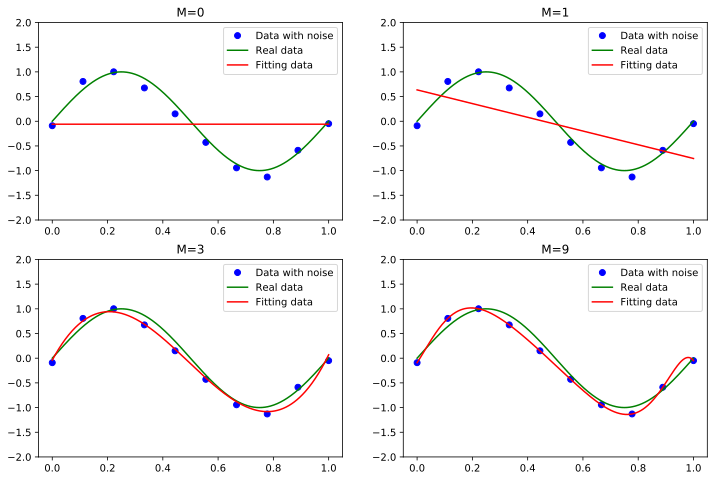

In [17]:
X_TRAIN = X.reshape(-1, 1)
Y_TRAIN = Y.reshape(-1, 1)

fig = plt.figure(figsize=(12,8))
for i, order in enumerate([0, 1, 3, 9]):
    
    plt.subplot(2, 2, i+1)

    poly = PolynomialFeatures(order)
    X_TRAIN_POLY = poly.fit_transform(X_TRAIN)
    lr = LinearRegression()
    lr.fit(X_TRAIN_POLY, Y_TRAIN)
    
    plt.ylim(-2, 2)
    plt.plot(X, Y, 'bo', label = 'Data with noise')
    plt.plot(X_points, Y_points, 'g', label = 'Real data')
    plt.plot(X_points, lr.predict(poly.fit_transform(X_points.reshape(-1, 1))), 'r', label = 'Fitting data')
   
    plt.title("M={}".format(order))
    plt.legend()
    plt.savefig('POLY_OUTPUT12.pdf', bbox_inches='tight')

添加正则项

In [18]:
from sklearn.linear_model import Ridge

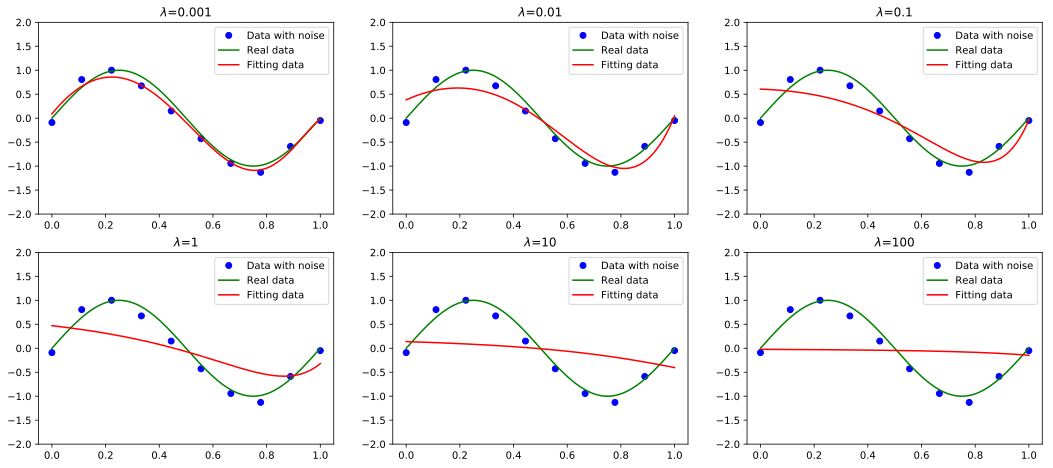

In [19]:
M = 9
fig = plt.figure(figsize=(18, 12))
for i, lamb in enumerate([0.001, 0.01, 0.1, 1, 10, 100]):
    
    plt.subplot(3, 3, i+1)

    poly = PolynomialFeatures(M)
    X_TRAIN_POLY = poly.fit_transform(X_TRAIN)
    lr = Ridge(alpha=lamb/2)
    lr.fit(X_TRAIN_POLY, Y_TRAIN)
    
    plt.ylim(-2, 2)
    plt.plot(X, Y, 'bo', label = 'Data with noise')
    plt.plot(X_points, Y_points, 'g', label = 'Real data')
    plt.plot(X_points, lr.predict(poly.fit_transform(X_points.reshape(-1, 1))), 'r', label = 'Fitting data')

    plt.title("$\lambda$={}".format(lamb))
    plt.legend()
    plt.savefig('POLY_OUTPUT13.pdf', bbox_inches='tight')

贝叶斯曲线拟合，参见1.4.8节

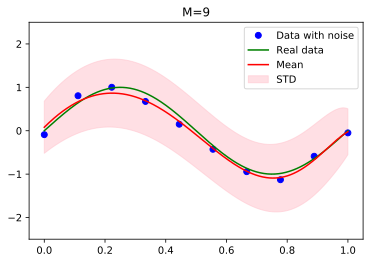

In [20]:
M = 9
poly = PolynomialFeatures(M)
X_TRAIN_POLY = poly.fit_transform(X_TRAIN)

alpha=5e-3 #模型参数精度
beta=11.1 #数据集噪声精度

I = np.eye(np.size(X_TRAIN_POLY, 1)) #单位矩阵
S_INV = alpha * I + beta * np.matmul(X_TRAIN_POLY.T, X_TRAIN_POLY)
S = np.linalg.inv(S_INV)
T = np.matmul(X_TRAIN_POLY.T, Y_TRAIN)

X_points_POLY = poly.fit_transform(X_points.reshape(-1, 1))
#计算均值
MEAN = beta * np.matmul(X_points_POLY, np.matmul(S, T))
#计算方差与标准差
SIGMA2 = 1/beta + np.sum(np.matmul(np.matmul(X_points_POLY, S), X_points_POLY.T), axis=1)/np.size(X_TRAIN, 0)#average
STD = np.sqrt(SIGMA2)

#绘制均值曲线及1个标准差区域
plt.ylim(-2.5, 2.5)

plt.plot(X, Y, 'bo', label = 'Data with noise')
plt.plot(X_points, Y_points, 'g', label = 'Real data')
plt.plot(X_points, MEAN, c="r", label="Mean")
plt.fill_between(X_points, MEAN.flatten() - STD, MEAN.flatten() + STD, color="pink", label="STD", alpha=0.5)

plt.title("M={}".format(M))
plt.legend()
plt.savefig('POLY_OUTPUT14.pdf', bbox_inches='tight')

参考文献：
- https://github.com/wzyonggege/statistical-learning-method;
- 《统计学习方法》第2版，李航；
- 《机器学习》课程系列讲义，杜小勤，Chapter1-CN.pdf；